In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import graphviz as gp
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report ,ConfusionMatrixDisplay


**Importing the dataset**

In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

**Feature Scaling**


In [ ]:
#Encode the variable Gender in order to fit that into data
lc=LabelEncoder()
df['Gender']=lc.fit_transform(df[['Gender']])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#will scale the salary column using standard scaler, according to the range equivalent to AGE .
MMS=MinMaxScaler(feature_range=(1,100))
df['EstimatedSalary']=MMS.fit_transform(df[['EstimatedSalary']])

**Splitting the dataset into the Training set and Test set**

In [ ]:
x=df.drop(['User ID','Purchased'],axis=1) #since the requirement here is to build a model with independant variables as salary, AGE and GENDER
y=df['Purchased']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30) 

**Fitting Random Forest to the Training set**

In [ ]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=5 )
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

**Predicting the Test set results**

In [ ]:
predicted_ytest=rfc.predict(x_test)
predicted_ytrain=rfc.predict(x_train) # predicting for training dataset too. To compare the fit between the test and training


**Making the Confusion Matrix**

In [ ]:
#confusion matrix for test dataset
CM=confusion_matrix(y_test,predicted_ytest)
print(CM)

[[67 10]
 [ 4 39]]


In [ ]:
#confusion matrix for training dataset
CM_train=confusion_matrix(y_train,predicted_ytrain)
print(CM_train)

[[173   7]
 [  6  94]]


In [ ]:
print(classification_report(y_test,predicted_ytest))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91        77
           1       0.80      0.91      0.85        43

    accuracy                           0.88       120
   macro avg       0.87      0.89      0.88       120
weighted avg       0.89      0.88      0.88       120



In [ ]:
print(classification_report(y_train,predicted_ytrain))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       180
           1       0.93      0.94      0.94       100

    accuracy                           0.95       280
   macro avg       0.95      0.95      0.95       280
weighted avg       0.95      0.95      0.95       280



**Visualising the Training set results**

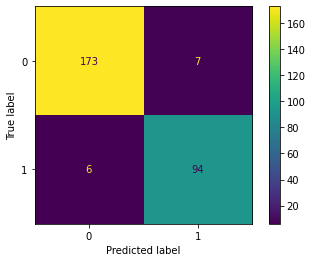

In [ ]:
ConfusionMatrixDisplay(CM_train).plot()

**Visualising the Test set results**

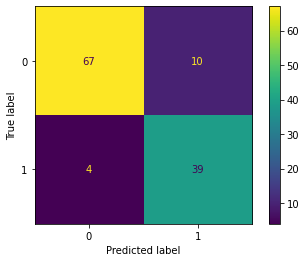

In [ ]:
ConfusionMatrixDisplay(CM).plot()